# Install Dependencies

In [7]:
!pip install --upgrade pip
# Current stable release for CPU and GPU
!pip install tensorflow==2.13.0
!pip install gym
!pip install keras
!pip install keras-rl2

# Test Random Environment with OpenAI Gym

In [8]:
import random
import gym
import matplotlib.pyplot as plt
from IPython import display

ModuleNotFoundError: No module named 'gym'

In [4]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
states = env.observation_space.shape[0]
actions = env.action_space.n

NameError: name 'gym' is not defined

In [12]:
env, states, actions

(<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>,
 4,
 2)

Episode: 1 Score: 25.0
Episode: 2 Score: 34.0
Episode: 3 Score: 35.0
Episode: 4 Score: 51.0
Episode: 5 Score: 13.0
Episode: 6 Score: 40.0
Episode: 7 Score: 9.0
Episode: 8 Score: 12.0
Episode: 9 Score: 21.0
Episode: 10 Score: 19.0


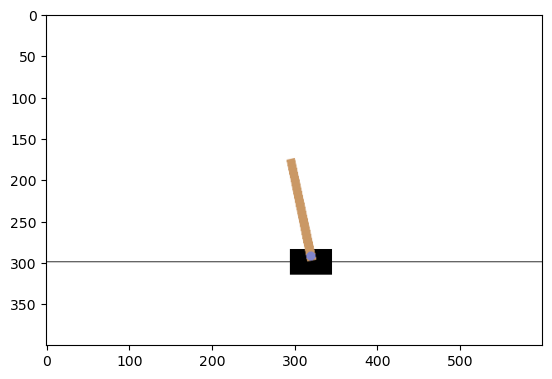

In [13]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        plt.imshow(env.render())
        
        action = random.choice([0, 1])
        n_state, reward, done, info, _ = env.step(action)
        score += reward

    print(f'Episode: {episode} Score: {score}')

# Create a Deep Learning Model with Keras

In [1]:
!pip install -U tensorflow keras  # Keras-CV needs TF 2.15 when used with Keras 3
!pip install -U keras-cv
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
import keras_cv

ModuleNotFoundError: No module named 'keras'

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Optimizer to train the deep learning model
from tensorflow.keras.optimizers import Adam 

In [22]:
# Passing four states and two different actions
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape = (1, states)))
    model.add(Dense(24, activation = 'relu'))
    model.add(Dense(24, activation = 'relu'))
    model.add(Dense(actions, activation = 'linear'))
    return model

In [23]:
model = build_model(states, actions)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 770 (3.01 KB)

 Trainable params: 770 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

# Build Agent with Keras-RL

In [25]:
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

ImportError: cannot import name 'model_from_config' from 'tensorflow.keras.models' (/opt/anaconda3/lib/python3.11/site-packages/keras/_tf_keras/keras/models/__init__.py)

In [ ]:
!pip install keras-rl2